In [14]:
%run init.ipynb

### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

# Composer

<img src='fig_composer.png' width='600'>

OBS. Pode-se acompanhar o __status dos jobs__ enviados para execução em: https://quantum-computing.ibm.com/jobs

# Estado inicial e medida

* Todos os qubits são inicialmente preparados no estado $|0\rangle$

* Medidas são feitas diretamente somente na base padrão $\{|0\rangle,|1\rangle\}$ 

## Erro de preparação/medida
Em uma 1ª rodada de medidas, preparando-se o estado $|0\rangle$ 8192 vezes no ibmq_belem, obtivemos 8160 vezes o estado $|0\rangle$ e 32 vezes o estado $|1\rangle$, tendo um erro de $\approx 0.39 \%$. Numa 2ª rodada de medidas, o erro foi de $0.46\ \%$. Na 3ª rodada, o erro foi de $\approx 0.49\ \%$.

_OBS._ Nesses erros de preparação, na verdade também estão embutidos erros nas medidas.

__Exercício:__ Verificar o erro de preparação nos outros chips.

## Superposição e medida em outra base

Vamos preparar o estado $$|+\rangle=H|0\rangle$$ e medir 1º na base computacional:
<img src='fig_H.png' width='300'>
Nesse caso, as probabilidades são:
\begin{align}
& Pr(0) = \frac{N_{0}}{N} \approx \frac{4312}{8192} = 0.5263671875 \approx 0.53 ,\\
& Pr(1) = \frac{N_{1}}{N} \equiv 1-Pr(0) \approx 0.47.
\end{align}
_OBS._ Idealmente deveríamos ter $Pr(0)=Pr(1)=0.5$.

Para fazer uma medida na base $\{|\pm\rangle\}$ aplicamos 1º uma Hadamard:
<img src='fig_HH.png' width='300'>
Nesse caso
\begin{align}
& Pr(+) = \frac{N_{0}}{N} \approx \frac{8155}{8192} = 0.9954833984375 \approx 0.99 ,\\
& Pr(-) = 1-Pr(+) \approx 0.01.
\end{align}
_OBS._ Idealmente deveríamos ter $Pr(+)=1$ e $Pr(-)=0$.

__Exercício:__ Prepare o estado $|+\rangle$ e meça na base $\{|\oplus\rangle,|\ominus\rangle\}$.

In [2]:
4312/8192, 8155/8192

## Tomografia de estados
### 1 qubit
O estado de um sistema quântico é descrito de forma geral por um operador densidade, que é uma matriz positiva semi-definida, $\rho\ge\mathbb{O}$, e com traço igual a um, $Tr(\rho)=1$. __Probabilidades__ são dadas por
$$Pr(x|\rho)=Tr(\Pi_{x}\rho),$$
com $\Pi_{x}=|x\rangle\langle x|$. Para estados puros $|\psi\rangle$ temos que $\rho=|\psi\rangle\langle\psi|$ e $Pr(x|\rho)=|\langle x|\psi\rangle|^{2}$. 

O __valor médio__ de um observável $X$ é dado por $\langle X\rangle=\sum_{x}xPr(x)=Tr(X\rho)$.

As __matrizes de Pauli__ e a matriz densidade,
\begin{align}
X\equiv\sigma_{1}=\begin{bmatrix}0&1\\1&0\end{bmatrix}, Y\equiv\sigma_{2}=\begin{bmatrix}0&-i\\i&0\end{bmatrix}, Z\equiv\sigma_{3}=\begin{bmatrix}1&0\\0&-1\end{bmatrix}, I\equiv\sigma_{0}=\begin{bmatrix}1&0\\0&1\end{bmatrix},
\end{align}
formam uma base ortonormal para o espaço vetorial composto por matrizes complexas $2\text{x}2$:
$$\rho= aX+bY+cZ+dI,$$
com
$$a=\langle X\rangle/2=Tr(\rho X)/2, b=\langle Y\rangle/2=Tr(\rho Y)/2, c=\langle Z\rangle/2=Tr(\rho Z)/2, d=Tr(\rho)/2 =1/2.$$
Por conseguinte
$$\rho= \frac{1}{2}\left(I+\langle X\rangle X+ \langle Y\rangle Y+ \langle Z\rangle Z\right).$$
Então, se conhecemos os valores médios desses observáveis, conhecemos o __estado quântico__ correspondente do sistema.

In [3]:
a,b,c,d = symbols('a b c d')
a, b, c, d

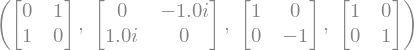

In [4]:
X = Matrix([[0,1],[1,0]]); Y = Matrix([[0,-1j],[1j,0]]); Z = Matrix([[1,0],[0,-1]]); I = Matrix([[1,0],[0,1]])
X, Y, Z, I

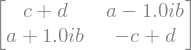

In [5]:
rho = a*X+b*Y+c*Z+d*I; rho

In [6]:
tr(X*rho), simplify(tr(Y*rho)), tr(Z*rho), tr(I*rho),

Pode-se verificar que as decomposições espectrais (autovalores e autovetores) desses observáveis são
\begin{align}
& X = |+\rangle\langle +|-|-\rangle\langle -|, \\
& Y = |\oplus\rangle\langle\oplus|-|\ominus\rangle\langle\ominus|, \\
& Z = |0\rangle\langle 0|-|1\rangle\langle 1|.
\end{align}
Os valores médios correspondente são então
\begin{align}
& \langle X\rangle = Pr(+)-Pr(-)=2Pr(+)-1, \\
& \langle Y\rangle = Pr(\oplus)-Pr(\ominus)=2Pr(\oplus)-1, \\
& \langle Z\rangle = Pr(0)-Pr(1)=2Pr(0)-1.
\end{align}

#### Exemplo: estado $|0\rangle$
Dos experimentos obtemos 
\begin{align}
& Pr(+) \approx 4260/8192 \approx 0.52, \\
& Pr(\oplus) \approx 4470/8192 \approx 0.55, \\
& Pr(0) \approx 8158/8192 \approx 0.99.
\end{align}
Com isso, teremos que
\begin{align}
\langle X\rangle \approx 0.04, \langle Y\rangle \approx 0.09, \langle Z\rangle \approx 0.99.
\end{align}
Com isso, temos que o estado tomografado é
$$\rho_{e} = \begin{bmatrix}0.996 & 0.02-0.46 i \\ 0.02+0.46 i & 0.004 \end{bmatrix},$$
sendo que o teórico é
$$\rho_{t} = \begin{bmatrix}1 & 0 \\ 0 & 0 \end{bmatrix}.$$

In [7]:
pp=4260/8192; pop=4470/8192; p0=8158/8192; pp, pop, p0

In [8]:
Xav = 2*pp-1; Yav = 2*pop-1; Zav = 2*p0-1; Xav, Yav, Zav

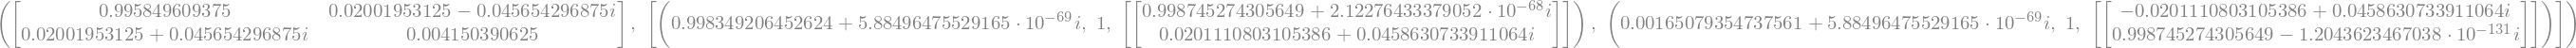

In [9]:
def rho_1qb_tomo(Xav,Yav,Zav):
    return (1/2)*(Xav*X+Yav*Y+Zav*Z+I)
rho = rho_1qb_tomo(Xav,Yav,Zav); rho, rho.eigenvects()

__Estados não físicos:__ Por causa do número finito de medidas feitas para estimar as probabilidades e os valores médios, e dos erros experimentais e/ou aleatórios que ocorrem nas diferentes preparações, essa maneira simplória de estimar o estado quântico do sistema pode levar a matrizes densidade não válidas (com autovalores negativos ou mesmo imaginários).

## 2 qubits
Podemos formar uma base para matrizes complexas $4\text{x}4$ tomando o produto tensorial das matrizes de Pauli. Assim a matriz densidade de um sistema com 2 qubits pode ser escrita como
\begin{align}
\rho &= \frac{1}{4}\Big(I\otimes I + \langle X^{a}\rangle X\otimes I  + \langle Y^{a}\rangle Y\otimes I  + \langle Z^{a}\rangle Z\otimes I + \langle X^{b}\rangle I\otimes X + \langle Y^{b}\rangle I\otimes Y  + \langle Z^{b}\rangle I\otimes Z \\
& \hspace{1.2cm} + \langle X\otimes X\rangle X\otimes X + \langle X\otimes Y\rangle X\otimes Y   + \langle X\otimes Z\rangle X\otimes Z \\
& \hspace{1.2cm} + \langle Y\otimes X\rangle Y\otimes X + \langle Y\otimes Y\rangle Y\otimes Y   + \langle Y\otimes Z\rangle Y\otimes Z \\ 
& \hspace{1.2cm} + \langle Z\otimes X\rangle Z\otimes X + \langle Z\otimes Y\rangle Z\otimes Y   + \langle Z\otimes Z\rangle Z\otimes Z \Big).
\end{align}

In [10]:
c00, a1, a2, a3, b1, b2, b3 = symbols('c_{00} a_1 a_2 a_3 b_1 b_2 b_3')
c11, c12, c13, c21,c22,c23,c31,c32,c33 = symbols('c_{11} c_{12} c_{13} c_{21} c_{22} c_{23} c_{31} c_{32} c_{33}')
c00, a1, a2, a3, b1, b2, b3, c11, c12, c13, c21,c22,c23,c31,c32,c33

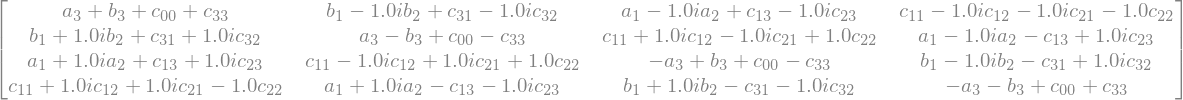

In [11]:

rho = c00*tp(I,I) + a1*tp(X,I) + a2*tp(Y,I) + a3*tp(Z,I) + b1*tp(I,X) + b2*tp(I,Y) + b3*tp(I,Z) 
rho += c11*tp(X,X) + c12*tp(X,Y) + c13*tp(X,Z) + c21*tp(Y,X) + c22*tp(Y,Y) + c23*tp(Y,Z)
rho += c31*tp(Z,X) + c32*tp(Z,Y) + c33*tp(Z,Z)
rho

In [12]:
tr(rho), tr(rho*tp(X,I)), simplify(tr(rho*tp(Y,I))), simplify(tr(rho*tp(Z,I))), \
simplify(tr(rho*tp(I,X))), simplify(tr(rho*tp(I,Y))), simplify(tr(rho*tp(I,Z))), \
tr(rho*tp(X,X)), simplify(tr(rho*tp(X,Y))), simplify(tr(rho*tp(X,Z))), \
simplify(tr(rho*tp(Y,X))), simplify(tr(rho*tp(Y,Y))), simplify(tr(rho*tp(Y,Z))), \
tr(rho*tp(Z,X)), simplify(tr(rho*tp(Z,Y))), simplify(tr(rho*tp(Z,Z)))

### "Funções correlação"
Para calcular valores médios do tipo $\langle A\otimes B\rangle$ usamos as decomposições espectrais 
$$A\otimes B = \sum_{j}a_{j}|a_{j}\rangle\langle a_{j}|\otimes\sum_{k}b_{k}|b_{k}\rangle\langle b_{k}| = \sum_{j,k}a_{j}b_{k}|a_{j}b_{k}\rangle\langle a_{j}b_{k}|.$$
Assim
$$\langle A\otimes B\rangle = \sum_{j,k}a_{j}b_{k}Pr(a_{j},b_{k}).$$
Alguns exemplos particulares são
\begin{align}
\langle X\otimes X\rangle &= (+1)(+1)Pr(+,+) + (+1)(-1)Pr(+,-) + (-1)(+1)Pr(-,+) + (-1)(-1)Pr(-,-) \\
& = Pr(+,+) -Pr(+,-) -Pr(-,+) + Pr(-,-), \\
\langle X\otimes Y\rangle &= (+1)(+1)Pr(+,\oplus) + (+1)(-1)Pr(+,\ominus) + (-1)(+1)Pr(-,\oplus) + (-1)(-1)Pr(-,\ominus) \\
& = Pr(+,\oplus) -Pr(+,\ominus) -Pr(-,\oplus) + Pr(-,\ominus), \\
\langle X\otimes Z\rangle &= (+1)(+1)Pr(+,0) + (+1)(-1)Pr(+,1) + (-1)(+1)Pr(-,0) + (-1)(-1)Pr(-,1) \\
& = Pr(+,0) -Pr(+,1) -Pr(-,0) + Pr(-,1), \\
& \vdots.
\end{align}

__Exercício:__ Escreva as outras 6 "funções correlação" em termos das probabilidades conjuntas.

### Probabilidades marginais
Uma vez estimadas, por exemplo, as distribuições de probabilidade conjuntas
\begin{align}
& \{Pr(+,+),Pr(+,-),Pr(-,+),Pr(-,-)\}, \\
& \{Pr(\oplus,\oplus),Pr(\oplus,\ominus),Pr(\ominus,\oplus),Pr(\ominus,\ominus)\}, \\
& \{Pr(0,0),Pr(0,1),Pr(1,0),Pr(1,1)\}, \\
\end{align}
obtemos as distribuições de probabilidades marginais da seguinte forma
\begin{align}
& \{Pr_{a}(+),Pr_{a}(-)\} =  \{Pr(+,+)+Pr(+,-),Pr(-,+)+Pr(-,-)\}, \\
& \{Pr_{b}(+),Pr_{b}(-)\} =  \{Pr(+,+)+Pr(-,+),Pr(+,-)+Pr(-,-)\}, \\
& \vdots.
\end{align}
__Exercício:__ Escreva as distribuições de probabilidade marginais $\{Pr_{a}(\oplus),Pr_{a}(\ominus)\}$, $\{Pr_{b}(\oplus),Pr_{b}(\ominus)\}$, $\{Pr_{a}(0),Pr_{a}(1)\}$ e $\{Pr_{b}(0),Pr_{b}(1)\}$ em termos das probabilidades conjuntas.

__Exercício:__ Forneça outro exemplo de distribuição de probabilidades conjunta que poderíamos usar para obter a distribuição de probabilidades marginal $\{Pr_{a}(+),Pr_{a}(-)\}$.

Os valores médios locais podem ser calculados como nos seguintes exemplos:
\begin{align}
& \langle X^{a}\rangle = Pr_{a}(+)-Pr_{a}(-), \\
& \langle Y^{a}\rangle = Pr_{a}(\oplus)-Pr_{a}(\ominus), \\
& \langle Z^{a}\rangle = Pr_{a}(0)-Pr_{a}(1).
\end{align}
__Exercício:__ Escreva os valores médios $\langle X^{b}\rangle,\langle Y^{b}\rangle,\langle Z^{b}\rangle$ em termos das probabilidades marginais correspondentes.

### Complexidade da tomografia de estados quânticos

Para $n$ qubits, como para cada um deles temos quatro matrizes de Pauli, teremos que medir
$$N=4^{n}-1=2^{2n}-1 \text{ valores médios}.$$
Para $n=1$ temos $N=3$. Para $n=2$ temos $N=15$. Embora não precisamos de fato medir todos esses $N$ valores médios, pois podemos obter as distribuições de probabilidades marginais a partir das distribuições de probabilidades conjuntas, $N$ cresce realmente muito rápido com $n$. Isso impossibilita fazer tomografia de estados quânticos na prática quando $n$ é grande. E Nem precisa ser muito grande:

In [30]:
n = 137; N = 4**n-1; N-10**82

20354201441027016733116592294117482916287606860189680019559568902170379456331382783

Por isso, muitos artigos foram e ainda são feitos para estimar a qualidade de preparação de estados com menos medidas, com medidas aleatórias, etc.

OBS. Quando forem fazer tomografia de estados quânticos de circuitos grandes, pensem 2 vezes para não passar do limite de madidas que cada usuário tem no IBMQ.

### Estado emaranhado
Podemos criar um estado emaranhado $$|\Phi_{+}\rangle=(|00\rangle+|11\rangle)/\sqrt{2}$$ usando
\begin{align}
& CNOT_{12}(H\otimes I)|00\rangle = CNOT_{12}(H|0\rangle\otimes I|0\rangle) = CNOT_{12}|+\rangle|0\rangle \\ 
& = CNOT_{12}\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\otimes|0\rangle = CNOT_{12}(|00\rangle+|10\rangle)/\sqrt{2} = |\Phi_{+}\rangle.
\end{align}
Circuito quântico:
<img src='fig_phip.png' width='400'>

Mais adiante usaremos uma maneira melhor e pronta para fazer tomografia de estados quânticos. Nesse caso, só observo que para medidas de $Z\otimes Z$ obtemos as probabilidades
$$Pr(0,0)\approx 0.477, Pr(0,1)\approx 0.031, Pr(1,0)\approx 0.031, Pr(1,1)\approx 0.461,$$
que é um indicativo de que preparamos algo similar ao estado que queríamos preparar.

__Exercício:__ Prepare o estado $$|\Psi_{+}\rangle=\frac{1}{\sqrt{2}}(|01\rangle+|10\rangle)$$ e obtenha a distribuição de probabilidades para medidas de $Z\otimes Z$. 

In [15]:
p00 = 3906/8192; p01 = 257/8192; p10 = 253/8192; p11 = 3776/8192; p00,p01,p10,p11